In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# load csv file and printing first 5 records
df = pd.read_csv("general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [10]:
df = df.drop_duplicates()

In [11]:
total_len = len(df)
total_len

4410

In [14]:
# Getting no of Attrition == Yes
attr_yes_count = len(df[df.Attrition=="Yes"])
attr_yes_count

711

In [15]:
# Getting no of Attrition == No
attr_no_count = len(df[df.Attrition=="No"])
attr_no_count

3699

In [16]:
print("Total Employees : ",total_len)
print("Number Of Attrition == Yes : ",attr_yes_count,(attr_yes_count/total_len)*100)
print("Number Of Attrition == No : ",attr_no_count,(attr_no_count/total_len)*100)

Total Employees :  4410
Number Of Attrition == Yes :  711 16.122448979591837
Number Of Attrition == No :  3699 83.87755102040816


From the above data we come to know from the whole data 16.12% people leave

and 83.87% Stay

# Other way to do same analysis using value_count()
## Note : value_count() works on Series only
### So, first we need to take the Perticular Column as Series  

In [18]:
df["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

## From the given Data 711 People have Left

In [20]:
df["Attrition"].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

## Which means 16% people left

In [21]:
# Attrition == Yes
df["Attrition"].value_counts()["Yes"]

711

In [22]:
# Attrition == No
df["Attrition"].value_counts()["No"]

3699

# Finding % Using value_counts(normalize = True)

In [23]:
df["Attrition"].value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

# Analysis Of Attrition on Gender basis

In [34]:
# Getting no of Attrition = Yes And Gender = Male
attr_yes_male_count = (df[df.Attrition=="Yes"].Gender=="Male").value_counts()[1]     # [1] for true values only 
attr_yes_male_count

441

In [35]:
# Getting no of Attrition = Yes And Gender = Male
attr_yes_female_count = (df[df.Attrition=="Yes"].Gender=="Female").value_counts()[1]     # [1] for true values only 
attr_yes_female_count

270

In [39]:
total_attr = df["Attrition"].value_counts()["Yes"]
print("Total Employees Who Leave : ",total_attr)
print("Number of Male Leaving : ",attr_yes_male_count,(attr_yes_male_count/total_attr)*100)
print("Number of Female Leaving : ",attr_yes_female_count,(attr_yes_female_count/total_attr)*100)

Total Employees Who Leave :  711
Number of Male Leaving :  441 62.0253164556962
Number of Female Leaving :  270 37.9746835443038


## So we Conclude from above result that rate of male attrition is more than Female

ie. male = 62%

   Female = 37.9%

# Marital Status Analysis Who are Leaving and Staying

In [41]:
# Different Value Counts in Marital Status
df["MaritalStatus"].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [43]:
# Married People Left
attr_yes_married_count = len(df[df.Attrition == "Yes"][df.MaritalStatus == "Married"])
attr_yes_married_count

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


252

In [49]:
# Single People Left
attr_yes_single_count = len(df[df.Attrition=="Yes"][df.MaritalStatus=="Single"])
attr_yes_single_count

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


360

In [50]:
# Divorced People Left
attr_yes_divorced_count = len(df[df.Attrition=="Yes"][df.MaritalStatus=="Divorced"])
attr_yes_divorced_count

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


99

In [51]:
total_attr = df["Attrition"].value_counts()["Yes"]
print("Total Employes Who leave :",total_attr)
print("Number of Married People leaving :",attr_yes_married_count,(attr_yes_married_count/total_attr)*100,"%")
print("Number of Single People Leaving :",attr_yes_single_count,(attr_yes_single_count/total_attr)*100,"%")
print("Number of Divorced People Leaving :",attr_yes_divorced_count,(attr_yes_divorced_count/total_attr)*100,"%")

Total Employes Who leave : 711
Number of Married People leaving : 252 35.44303797468354 %
Number of Single People Leaving : 360 50.63291139240506 %
Number of Divorced People Leaving : 99 13.924050632911392 %


In [52]:
total_attr = df["Attrition"].value_counts()["Yes"]
print("Total Employes Who leave :",total_attr)
print("Number of Married People leaving :",attr_yes_married_count,(attr_yes_married_count/total_attr)*100,"%")
print("Number of Single People Leaving :",attr_yes_single_count,(attr_yes_single_count/total_attr)*100,"%")
print("Number of Divorced People Leaving :",attr_yes_divorced_count,(attr_yes_divorced_count/total_attr)*100,"%")

Total Employes Who leave : 711
Number of Married People leaving : 252 35.44303797468354 %
Number of Single People Leaving : 360 50.63291139240506 %
Number of Divorced People Leaving : 99 13.924050632911392 %


## So the conclusion From above Analysis

- Single people are leaving mostly. Rate : 50.63 %
- Married Rate : 35.44 %
- Divorced Rate : 13.92 %

### The Divorsed People are mostly not Leaving.

# Analysis Based on Percent Salary Hikes

In [55]:
# Making a different DataFrame Which only contains Details of person having Attrition == Yes
df_attr_yes = df[df.Attrition == "Yes"]

In [57]:
df_attr_yes.PercentSalaryHike.value_counts()

13    102
12     90
11     90
14     87
15     63
17     45
19     42
18     39
22     30
16     30
21     27
20     27
25     15
23     15
24      9
Name: PercentSalaryHike, dtype: int64

## Person Having Salary Hike more than 19% are Leaving Less

### Lets See The Analysis of PercentSalary Increase by Grouping in range

In [59]:
# Groups 13-15 , 16-18 , 19 - 21 , 22-24 + 25


In [68]:
def group_PercentSalaryHike(n,m):
    sum=0
    for i in range(n,m+1):
        sum+=(df_attr_yes.PercentSalaryHike.value_counts()[i])
    return sum

In [70]:
print("%Hike | Count")
print("13-15 : ",group_PercentSalaryHike(13,15))
print("16-18 : ",group_PercentSalaryHike(16,18))
print("19-21 : ",group_PercentSalaryHike(19,21))
print("22-24 : ",group_PercentSalaryHike(22,24))

%Hike | Count
13-15 :  252
16-18 :  114
19-21 :  96
22-24 :  54


## Person with 13 - 15% and 16 - 18% are Having high atrrition Rate

### So less Salary Hike may be one cause of Leaving Too

In [71]:
df_hike = pd.DataFrame([group_PercentSalaryHike(13,15),group_PercentSalaryHike(16,18),group_PercentSalaryHike(19,21),group_PercentSalaryHike(22,25)],index=["13-15","16-18","19-21","22-25"],columns=["Count"])

In [72]:
print("Percent Salary Hike Range Count")
df_hike.head()

Percent Salary Hike Range Count


,Count
13-15,252
16-18,114
19-21,96
22-25,69


## Person with 13 - 15% and 16 - 18% are leaving mostly

### So less Salary Hike may be one cause of Leaving Too

# Attrition Analysis Based on Age

In [73]:
df_attr_yes["Age"].value_counts()

29    54
31    54
28    42
26    36
33    36
32    33
35    30
30    27
34    27
24    21
25    18
36    18
44    18
21    18
20    18
41    18
19    18
39    18
37    18
22    15
58    15
40    15
50    15
18    12
23    12
46    12
27     9
55     9
52     9
56     9
47     9
38     6
49     6
45     6
51     6
43     6
53     6
42     6
48     6
Name: Age, dtype: int64

In [74]:
ages = df_attr_yes["Age"].value_counts()
ages.index

Int64Index([29, 31, 28, 26, 33, 32, 35, 30, 34, 24, 25, 36, 44, 21, 20, 41, 19,
            39, 37, 22, 58, 40, 50, 18, 23, 46, 27, 55, 52, 56, 47, 38, 49, 45,
            51, 43, 53, 42, 48],
           dtype='int64')

Text(0,0.5,'Attrition Count')

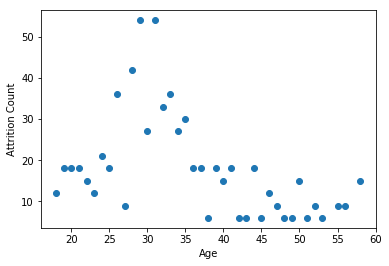

In [77]:
plt.scatter(ages.index,ages)
plt.xlabel("Age")
plt.ylabel("Attrition Count")

(array([ 66.,  66., 141., 150.,  93.,  57.,  36.,  33.,  36.,  33.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <a list of 10 Patch objects>)

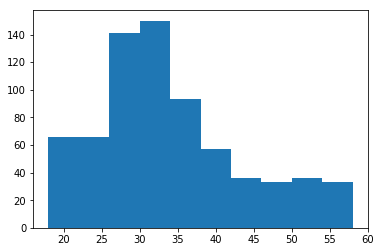

In [78]:
plt.hist(df_attr_yes.Age)

## We Observe that Age Range 27-37 Have a High Attrition Rate

# Cheching Normality

In [79]:
df.Age.skew()

0.413004952697689

In [80]:
df.MonthlyIncome.skew()

1.3688841631898714

(array([1095., 1047.,  870.,  327.,  330.,  168.,  156.,   54.,  162.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

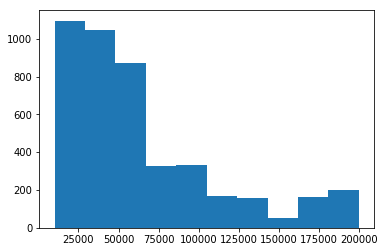

In [81]:
plt.hist(df.MonthlyIncome)

(array([ 66.,  66., 141., 150.,  93.,  57.,  36.,  33.,  36.,  33.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <a list of 10 Patch objects>)

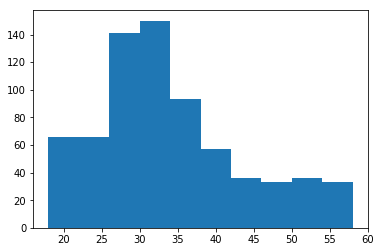

In [82]:
plt.hist(df_attr_yes.Age)

## From above graph we can say that Age is Normalized

In [83]:
df.MonthlyIncome.kurt()

1.0002318550155214

In [84]:
df.Age.kurt()

-0.40595053984966967

{'whiskers': [<matplotlib.lines.Line2D at 0x2acb30f9f28>,
 'caps': [<matplotlib.lines.Line2D at 0x2acb31017b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acb30f99e8>],
 'medians': [<matplotlib.lines.Line2D at 0x2acb3101cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acb310b470>],
 'means': []}

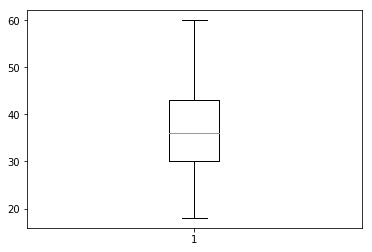

In [85]:
plt.boxplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x2acb31b1c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2acb31b84e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2acb31b1710>],
 'medians': [<matplotlib.lines.Line2D at 0x2acb31b8d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2acb31b8e10>],
 'means': []}

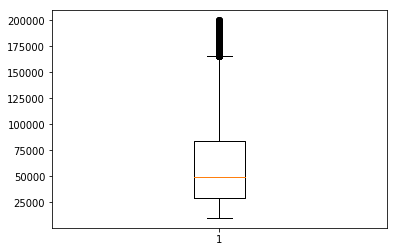

In [89]:
plt.boxplot(df.MonthlyIncome)

In [90]:
df.MonthlyIncome.mean()

65029.31292517007

In [91]:
df.MonthlyIncome.median()

49190.0

# Analysis Department Wise

In [92]:
df_attr_yes.Department.value_counts()

Research & Development    453
Sales                     201
Human Resources            57
Name: Department, dtype: int64

In [93]:
attr_yes_rnd_count = df_attr_yes.Department.value_counts()["Research & Development"]
attr_yes_rnd_count

453

In [94]:
attr_yes_sales_count = df_attr_yes.Department.value_counts()["Sales"]
attr_yes_sales_count

201

In [95]:
attr_yes_humRes_count = df_attr_yes.Department.value_counts()["Human Resources"]
attr_yes_humRes_count

57

In [96]:
total_attr = df["Attrition"].value_counts()["Yes"]
print("Total Employes Who leave :",total_attr)
print("Number of People leaving of R & D:",attr_yes_rnd_count,(attr_yes_rnd_count/total_attr)*100,"%")
print("Number of People Leaving of Sales:",attr_yes_sales_count,(attr_yes_sales_count/total_attr)*100,"%")
print("Number of People Leaving of Human Resources:",attr_yes_humRes_count,(attr_yes_humRes_count/total_attr)*100,"%")

Total Employes Who leave : 711
Number of People leaving of R & D: 453 63.71308016877637 %
Number of People Leaving of Sales: 201 28.270042194092827 %
Number of People Leaving of Human Resources: 57 8.016877637130802 %


# Therefore we can analyse from above data that People from Research and Development Department have a high Attrition Rate

# With Respect to Total Data ie. Attr=Yes and No

In [97]:
master_len = len(df)
master_len

4410

In [98]:
rnd_total_count = len(df[df.Department == "Research & Development"])
sales_total_count = len(df[df.Department == "Sales"])
humRes_total_count = len(df[df.Department == "Human Resources"])

In [99]:
rnd_attr_yes_per = (attr_yes_rnd_count/ rnd_total_count) *100
rnd_attr_yes_per 

15.71279916753382

In [100]:
sales_attr_yes_per = (attr_yes_sales_count/ sales_total_count) *100
sales_attr_yes_per 

15.022421524663676

In [101]:
humRes_attr_yes_per = (attr_yes_humRes_count/ humRes_total_count) *100
humRes_attr_yes_per 

30.158730158730158

In [102]:
# Representing The REsult

print(f"there are total {master_len} records")
print(f"total R&D: {rnd_total_count} out of which {attr_yes_rnd_count} Left which is {round(rnd_attr_yes_per,2)}%")
print(f"total Sales: {sales_total_count} out of which {attr_yes_sales_count} Left which is {round(sales_attr_yes_per,2)}%")
print(f"total Human Resource: {humRes_total_count} out of which {attr_yes_humRes_count} Left which is {round(humRes_attr_yes_per,2)}%")

there are total 4410 records
total R&D: 2883 out of which 453 Left which is 15.71%
total Sales: 1338 out of which 201 Left which is 15.02%
total Human Resource: 189 out of which 57 Left which is 30.16%


In [103]:
df_attr_yes.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2


In [104]:
df_attr_yes.PercentSalaryHike.value_counts()

13    102
12     90
11     90
14     87
15     63
17     45
19     42
18     39
22     30
16     30
21     27
20     27
25     15
23     15
24      9
Name: PercentSalaryHike, dtype: int64